In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    #"font.serif": ["Palatino"],
})

# Building Quiz 02

![sliding pendulum](../images/sliding_pendulum.svg)

To describe the position of $m_2$, we can start by defining the position

- $\mathbf{r}_2 = \mathbf{r}_1 + \mathbf{r}_{2/1}$

- $\mathbf{r}_2 = x\hat{i} + L\sin\theta \hat{i} -L\cos\theta \hat{j}$

then, take two derivatives to determine velocity and acceleration, 

- $\mathbf{v}_2 = 
\frac{d \mathbf{r}_2}{dt} = 
\dot{x}\hat{i} 
+ L\dot{\theta}\cos\theta \hat{i} 
+L\dot{\theta}\sin\theta \hat{j} = \dot{x}\hat{i} + L\dot{\theta}\hat{e}_{\theta}$
- $\mathbf{a}_2 = 
\frac{d \mathbf{r}_2}{dt} =
\ddot{x}\hat{i} + 
+ (L\ddot{\theta}\cos\theta-L\dot{\theta}^2\sin\theta) \hat{i} 
+(L\ddot{\theta}\sin\theta+L\dot{\theta}^2\cos\theta) \hat{j}$


At this point, you have acceleration defined in terms of a fixed
coordinate system. You could solve for the equations of motion using
Newton's second law. You would separate each body from each other, then
solve for each of the constraint force and solve for the two generalized
coordinates, 

_or_

You define kinetic energy, and virtual work and set up the Lagrange equations

1. kinetic energy: $T = \frac{1}{2}m\mathbf{v}\cdot\mathbf{v}$
2. virtual work: $F\delta \mathbf{r} = mg\delta y_2$
3. $\delta W - \delta T = 0$

The system has 2 degrees of freedom, so you can choose 2 independent
generalized coordinates e.g. $\mathbf{q} = [x,~\theta]$, because 

- $x_2 = f(x,\theta) = x + L\sin\theta$
- $y_2 = f(x,\theta) = -L\cos\theta$

$\delta T = 
\frac{\partial T}{\partial x}\delta x +
\frac{\partial T}{\partial \dot{x}}\delta \dot{x} +
\frac{\partial T}{\partial \theta}\delta \theta +
\frac{\partial T}{\partial \dot{\theta}}\delta \dot{\theta}$

and

$\delta W = 
mg\frac{\partial y_2}{\partial \theta}\delta \theta =
mgL\sin\theta \delta \theta$

after integrating by parts you have two parts to the equation, the
$\delta x-$virtual displacements and the $\delta\theta-$virtual
displacements as such, 

$\left[\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{x}}\right) 
- \frac{\partial T}{\partial x}\right]\delta x 
+\left[\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{\theta}}\right) 
- \frac{\partial T}{\partial \theta} +mgL\sin\theta \right]\delta \theta
= 0$

which represents two coupled differential equations:

1. $(m_1+m_2)\ddot{x}+m_2L\cos\theta +m_2 L\dot{\theta}^2\sin\theta =0$
2.$m_2L^2\ddot{\theta}+
m_2L\ddot{x}+
m_2\dot{x}L\dot{\theta}\sin\theta+
mgL\sin\theta
= 0$

You can create an analytical solution by assuming $\sin\theta\approx
\theta$ and $\cos\theta\approx 1$ as such

$\left[\begin{array}
~m_1+m_2 & m_2 L \\
m_2 L & m_2 L^2\end{array}\right]
\left[\begin{array}
~\ddot{x}\\
\ddot{\theta}\end{array}\right]=
\left[\begin{array}
~0\\
-mgL\theta \end{array}\right]$

rewritten as a stiffness-mass eigenvalue problem, 

$\left[-\omega^2\mathbf{M}-\mathbf{K}\right]\left[\begin{array} ~x\\\theta\end{array}\right] = 0$.

Now, use [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy/reference/linalg.html) to solve for the eigenvalues _i.e. natural frequency_ $\omega^2$.  

In [12]:
m1 = 0.2
m2 = 0.1
L = 0.5
g = 9.81

M = np.array([[m1+m2, m2*L],[m2*L, m2*L**2]])
K = np.zeros((2,2))
K[1,1] = -m2*g*L
w2, v = linalg.eig(np.array([[0,0],[0,m2*g*L]]),M)

print(M)
print(K)

[[0.3   0.05 ]
 [0.05  0.025]]
[[ 0.      0.    ]
 [ 0.     -0.4905]]


In [3]:
print('natural frequencies:',w2**0.5)
print('eigenmodes:')
print(v/v[0,:])

natural frequencies: [0.       +0.j 5.4249424+0.j]
eigenmodes:
[[ 1.  1.]
 [ 0. -6.]]


When a natural frequency is $\omega_1 = 0$, it means one of the solutions is not a vibration. Usually, the whole system is moving. In this example, as mass 1 moves there are no restoring forces. So, focus on the second vibration mode

$-\omega^2\left[\begin{array}
~m_1+m_2 & m_2 L \\
m_2 L & m_2 L^2\end{array}\right]
\left[\begin{array}
~1\\
-6\end{array}\right](A\cos\omega t +B\sin\omega t)=
\left[\begin{array}
~0 & 0\\
0 & -mgL\theta \end{array}\right]
\left[\begin{array}
~1\\
-6\end{array}\right](A\cos\omega t +B\sin\omega t)$

1. $-\omega^2\ddot{x} = -10m_2gL(A\cos\omega t +B\sin\omega t)$
2. $-\omega^2\ddot{\theta} = 60m_2gL(A\cos\omega t +B\sin\omega t)$

You have an independent equation for $\theta(t)$ solving for integration constants, you get

1. $\ddot{x}(t) = -1/6(\theta(t))$
2. $\theta(t) = \theta_0\cos\omega t +\frac{\dot{\theta}_0}{\omega}\sin\omega t$

Finally, you can find $x(t)$ integrating twice

$x(t) = -\frac{10\theta_0}{\omega^2}\cos\omega t +x_0 +\dot{x}_0 t$

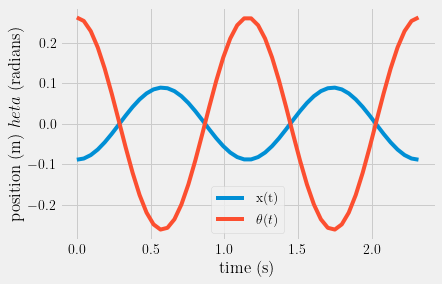

In [13]:
w = np.sqrt(60*m2*9.81*L)
t = np.linspace(0,4*np.pi/w)
theta = np.pi/12*np.cos(w*t)
x = -10*np.pi/12/w**2*np.cos(w*t)

plt.plot(t,x, label = 'x(t)')
plt.plot(t,theta, label = r'$\theta(t)$')

plt.ylabel('position (m)\\ $\theta$ (radians)')
plt.xlabel('time (s)')
plt.legend();


Define the position vectors, $\mathbf{r}_1$ and $\mathbf{r}_2$

In [14]:
r1 = np.block([x[:,np.newaxis],np.zeros((len(x),1))])
r2 = r1 + np.block([L*np.sin(theta[:,np.newaxis]),-L*np.cos(theta[:,np.newaxis])])

In [15]:
from matplotlib import animation
from IPython.display import HTML

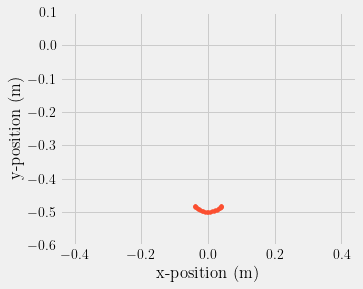

In [17]:
fig, ax = plt.subplots()

ax.set_xlim(( x.min()*5, x.max()*5))
ax.set_ylim((-0.6, 0.1))
ax.set_aspect('equal','box')
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')

line, = ax.plot([], [], 's-', markersize =15)
#marker, = ax.plot([], [], 'o', markersize=10)
ax.plot(r2[:,0],r2[:,1],'.')

2. Create an initializing (`init`) function that clears the previous line and marker

In [18]:
def init():
    line.set_data([], [])
    return (line,)

3. Create an animating (`animate`) function that updates the line

In [19]:
def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    marker: the marker for the end of the 2-bar linkage plotted above with ax.plot('...','o')'''
    line.set_data([r1[i,0], r2[i,0]], [r1[i,1], r2[i,1]])
    return (line, )

4. Create an animation (`anim`) variable using the `animation.FuncAnimation`

In [20]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(t)), interval=100, 
                               blit=True)

In [21]:
HTML(anim.to_html5_video())